In [413]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [414]:
iris = datasets.load_iris()

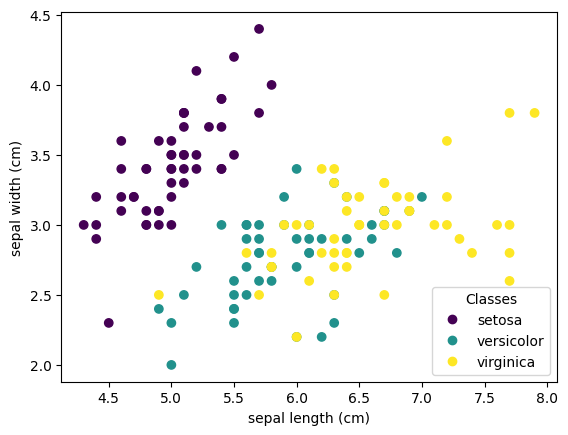

In [415]:
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

In [416]:
X = iris.data[:, :2]  # Use only two features for simplicity
y = (iris.target != 0) * 1  # Binary classification: 1 vs. (0 or 2)

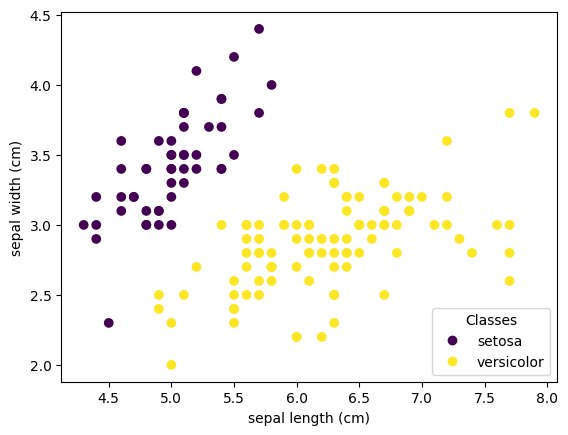

In [417]:
_, ax = plt.subplots()
scatter = ax.scatter(X[:, 0], X[:, 1], c=y)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

In [418]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [419]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

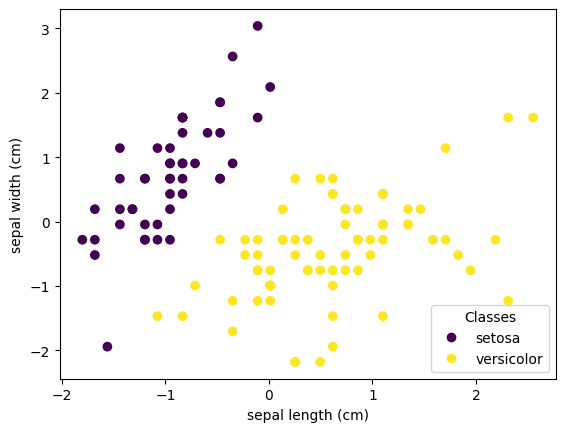

In [420]:
_, ax = plt.subplots()
scatter = ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

In [421]:
# Perceptron implementation
class Perceptron:
    def __init__(self, learning_rate=0.1, n_iterations=1000):
        self.lr = learning_rate
        self.n_iterations = n_iterations

    def fit(self, X, y):
        self.w = np.zeros(X.shape[1])
        self.b = 0
        for _ in range(self.n_iterations):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.w) + self.b
                y_predicted = self.activation_function(linear_output)
                update = self.lr * (y[idx] - y_predicted)
                self.w += update * x_i
                self.b += update

    def activation_function(self, x):
        return np.where(x >= 0, 1, 0)

    def predict(self, X):
        linear_output = np.dot(X, self.w) + self.b
        return self.activation_function(linear_output)

In [422]:
# Train the perceptron
model = Perceptron()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Calculate accuracy
accuracy = np.mean(predictions == y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


In [423]:
model.w, model.b

(array([ 0.45021233, -0.22268843]), 0.2)

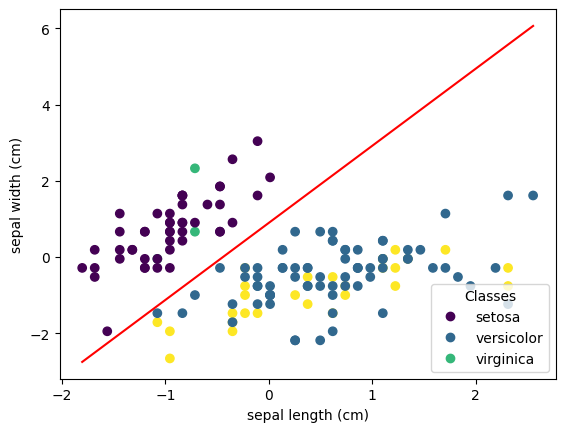

In [424]:

y = np.append(y_test+2,y_train)
X = np.append(X_test,X_train, axis = 0)
_, ax = plt.subplots()
scatter = ax.scatter(X[:,0], X[:,1], c=y)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

# Plot decision boundary line
x_values = np.linspace(min(X_train[:, 0]), max(X_train[:, 0]), 100)
# Calculate corresponding y values: y = -(w[0] * x + b) / w[1]
y_values = -(model.w[0] * x_values + model.b) / model.w[1]
ax.plot(x_values, y_values, color="red", label="Decision Boundary")

